In [1]:
import numpy as np
from PIL import Image
import os
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline
from data_loader import Dataset
import vae
from vae import encoder
from vae import decoder

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Unit test for encoder
vae.test_encoder()

Output shape should be (64, 16)
latent_samples shape: (64, 16)
latent_mean shape: (64, 16)
latent_sd shape: (64, 16)


In [3]:
# Unit test for decoder
vae.test_decoder()

Output shape should be (64, 500, 500, 4)
color_imgs shape: (64, 500, 500, 4)


In [4]:
def train_vae(num_epochs=20, batch_size=16, learning_rate=0.005, latent_dim=4, img_dim=500, input_dim=4, device='/gpu:0', data_type=tf.float32):
    train = Dataset('data/good_patches_gray/', 'data/good_patches/', batch_size, 500)
    tf.reset_default_graph()
    with tf.device(device):
        # Placeholder for the batch gray and color images
        gray_imgs = tf.placeholder(dtype=data_type, shape=[None, img_dim, img_dim, 1])
        color_imgs = tf.placeholder(dtype=data_type, shape=[None, img_dim, img_dim, 4])
        color_flatten = tf.reshape(color_imgs, shape=[-1, img_dim*img_dim*4]) # flatten the color image

        is_training = tf.placeholder(tf.bool, name='is_training')

        latent_samples, latent_mean, latent_sd = encoder(gray_imgs, latent_dim)
        generated_imgs = decoder(latent_samples, latent_dim)
        generated_flatten = tf.reshape(generated_imgs, shape=[-1, img_dim*img_dim*4])
        
        recon_loss = tf.reduce_sum(tf.squared_difference(color_flatten, generated_flatten), 1)
        divergence = - 0.5 * tf.reduce_sum(1.0 + latent_sd - tf.square(latent_mean) - tf.exp(latent_sd), 1)
        loss = tf.reduce_mean(recon_loss + divergence)
        optimizer = tf.train.AdamOptimizer(learning_rate)
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            train_op = optimizer.minimize(loss)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(num_epochs):
            print('Starting epoch %d' % (epoch))
            counter = 0
            for gray_imgs_np, color_imgs_np in train:
                feed_dict = {gray_imgs: gray_imgs_np, color_imgs: color_imgs_np, is_training: 1}
                loss_np, recon_loss_np, divergence_np, generated_imgs_np, latent_mean_np, latent_sd_np, _ = sess.run([loss, recon_loss, divergence, generated_imgs, latent_mean, latent_sd, train_op], 
                                                                                                                    feed_dict=feed_dict)
            counter += 1
            if counter % 10 == 0:
                print('Finished %d batches' % (counter))
            print('Done with epoch %d ' % (epoch))
            print('Ground truth image')
            plt.imshow(color_imgs_np[0,:,:,:].astype(np.uint8))
            plt.show()
            print('Generated image')
            plt.imshow(generated_imgs_np[0,:,:,:].astype(np.uint8))
            plt.show()
            print('Loss: ' + str(loss_np))
            print('Reconstruction loss: ' + str(np.mean(recon_loss_np)))
            print('KL Divergence: ' + str(np.mean(divergence_np)))

Starting epoch 0
Done with epoch 0 
Ground truth image


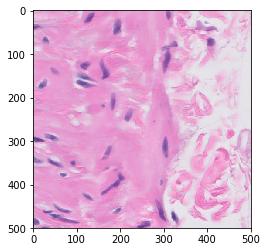

Generated image


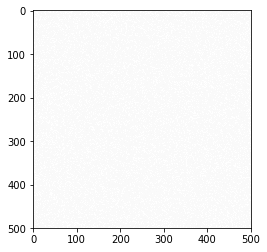

Loss: 46778930000.0
Reconstruction loss: 46778930000.0
KL Divergence: 0.0
Starting epoch 1
Done with epoch 1 
Ground truth image


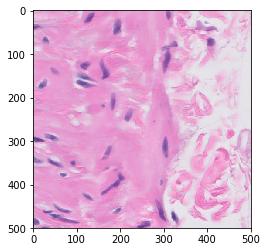

Generated image


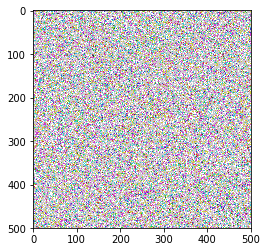

Loss: 9726906000.0
Reconstruction loss: 9726906000.0
KL Divergence: 0.0
Starting epoch 2
Done with epoch 2 
Ground truth image


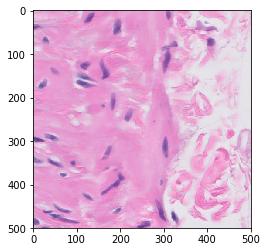

Generated image


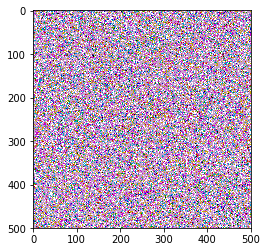

Loss: 8898583000.0
Reconstruction loss: 8898583000.0
KL Divergence: 0.0
Starting epoch 3
Done with epoch 3 
Ground truth image


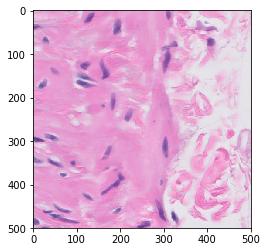

Generated image


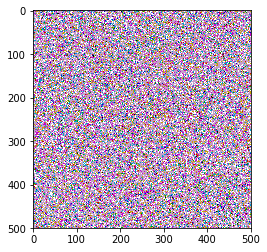

Loss: 8917236000.0
Reconstruction loss: 8917236000.0
KL Divergence: 0.0
Starting epoch 4
Done with epoch 4 
Ground truth image


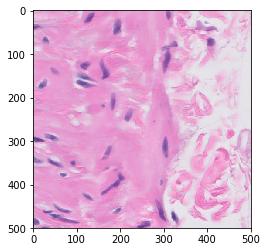

Generated image


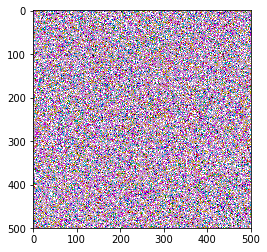

Loss: 8921440000.0
Reconstruction loss: 8921440000.0
KL Divergence: 0.0
Starting epoch 5
Done with epoch 5 
Ground truth image


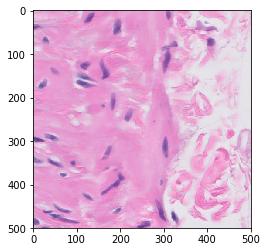

Generated image


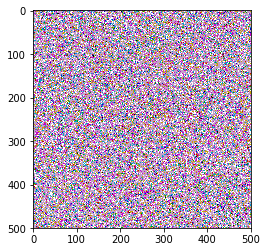

Loss: 8925072000.0
Reconstruction loss: 8925072000.0
KL Divergence: 0.0
Starting epoch 6
Done with epoch 6 
Ground truth image


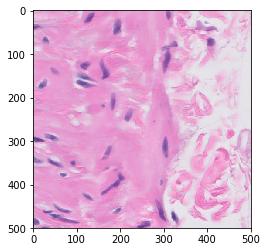

Generated image


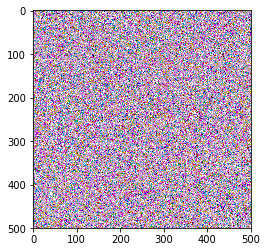

Loss: 8928903000.0
Reconstruction loss: 8928903000.0
KL Divergence: 0.0
Starting epoch 7
Done with epoch 7 
Ground truth image


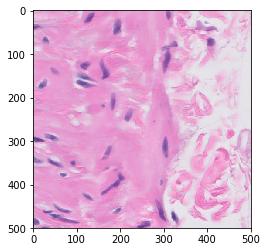

Generated image


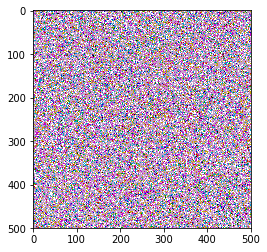

Loss: 8932974000.0
Reconstruction loss: 8932974000.0
KL Divergence: 0.0
Starting epoch 8
Done with epoch 8 
Ground truth image


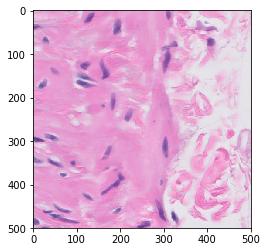

Generated image


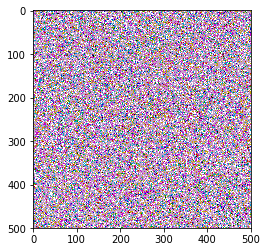

Loss: 8937121000.0
Reconstruction loss: 8937121000.0
KL Divergence: 0.0
Starting epoch 9
Done with epoch 9 
Ground truth image


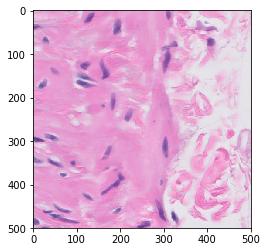

Generated image


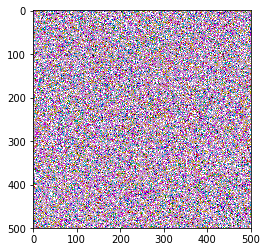

Loss: 8941331000.0
Reconstruction loss: 8941331000.0
KL Divergence: 0.0
Starting epoch 10
Done with epoch 10 
Ground truth image


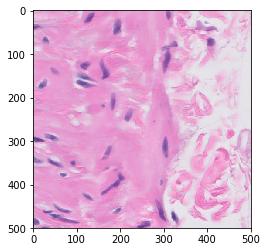

Generated image


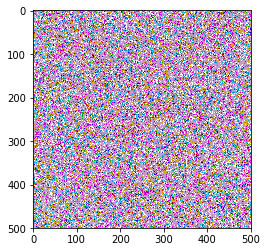

Loss: 8945608000.0
Reconstruction loss: 8945608000.0
KL Divergence: 0.0
Starting epoch 11
Done with epoch 11 
Ground truth image


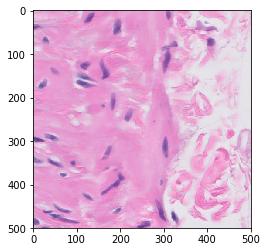

Generated image


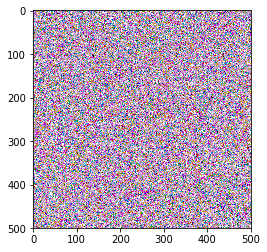

Loss: 8949561000.0
Reconstruction loss: 8949561000.0
KL Divergence: 0.0
Starting epoch 12
Done with epoch 12 
Ground truth image


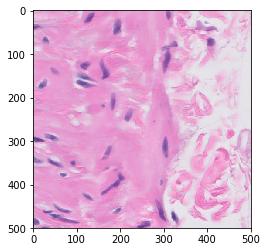

Generated image


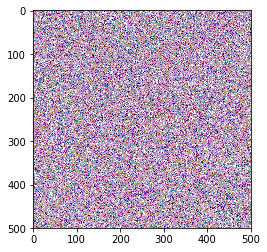

Loss: 8953130000.0
Reconstruction loss: 8953130000.0
KL Divergence: 0.0
Starting epoch 13
Done with epoch 13 
Ground truth image


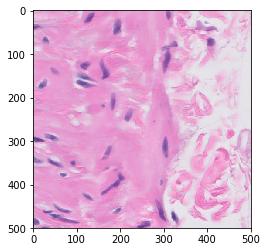

Generated image


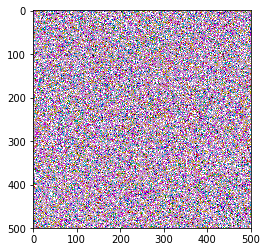

Loss: 8956329000.0
Reconstruction loss: 8956329000.0
KL Divergence: 0.0
Starting epoch 14
Done with epoch 14 
Ground truth image


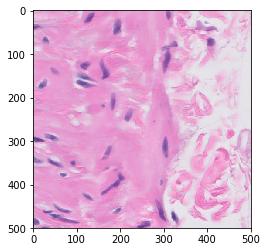

Generated image


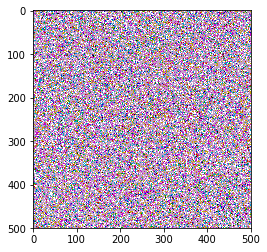

Loss: 8959037000.0
Reconstruction loss: 8959037000.0
KL Divergence: 0.0
Starting epoch 15
Done with epoch 15 
Ground truth image


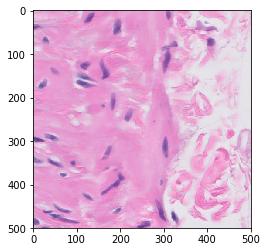

Generated image


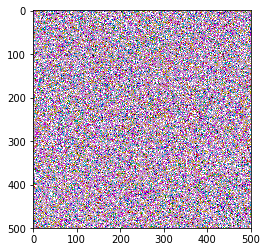

Loss: 8960980000.0
Reconstruction loss: 8960980000.0
KL Divergence: 0.0
Starting epoch 16
Done with epoch 16 
Ground truth image


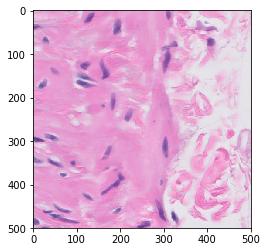

Generated image


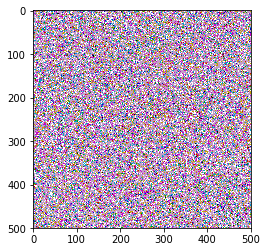

Loss: 8962206000.0
Reconstruction loss: 8962206000.0
KL Divergence: 0.0
Starting epoch 17
Done with epoch 17 
Ground truth image


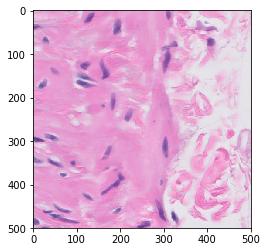

Generated image


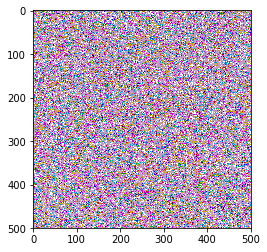

Loss: 8962766000.0
Reconstruction loss: 8962766000.0
KL Divergence: 0.0
Starting epoch 18
Done with epoch 18 
Ground truth image


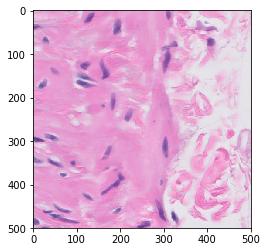

Generated image


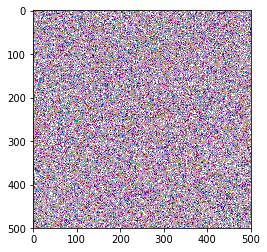

Loss: 8962744000.0
Reconstruction loss: 8962744000.0
KL Divergence: 0.0
Starting epoch 19
Done with epoch 19 
Ground truth image


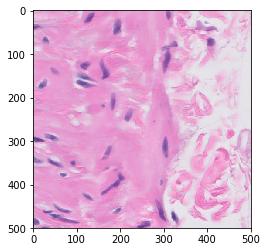

Generated image


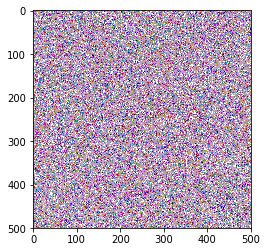

Loss: 8962234000.0
Reconstruction loss: 8962234000.0
KL Divergence: 0.0
Starting epoch 20
Done with epoch 20 
Ground truth image


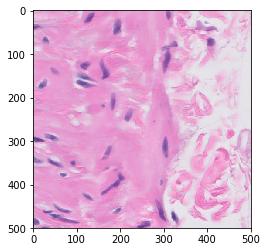

Generated image


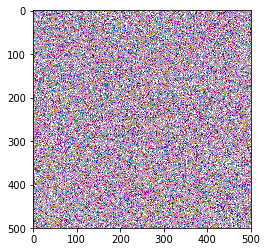

Loss: 8961335000.0
Reconstruction loss: 8961335000.0
KL Divergence: 0.0
Starting epoch 21
Done with epoch 21 
Ground truth image


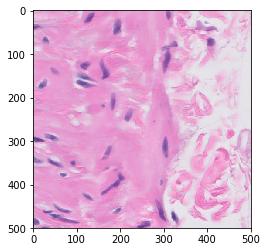

Generated image


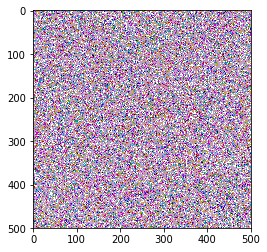

Loss: 8960213000.0
Reconstruction loss: 8960213000.0
KL Divergence: 0.0
Starting epoch 22
Done with epoch 22 
Ground truth image


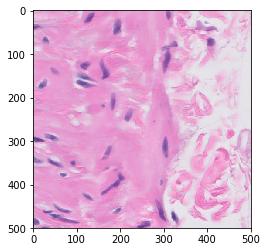

Generated image


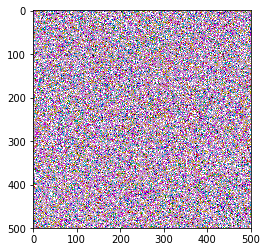

Loss: 8958845000.0
Reconstruction loss: 8958845000.0
KL Divergence: 0.0
Starting epoch 23
Done with epoch 23 
Ground truth image


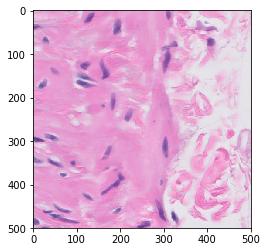

Generated image


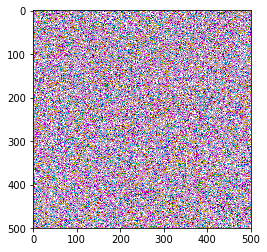

Loss: 8957587000.0
Reconstruction loss: 8957587000.0
KL Divergence: 0.0
Starting epoch 24
Done with epoch 24 
Ground truth image


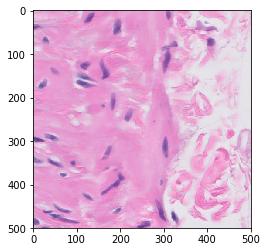

Generated image


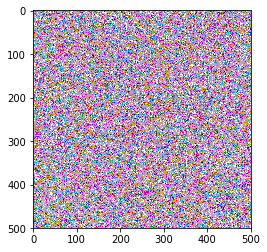

Loss: 8956295000.0
Reconstruction loss: 8956295000.0
KL Divergence: 0.0
Starting epoch 25
Done with epoch 25 
Ground truth image


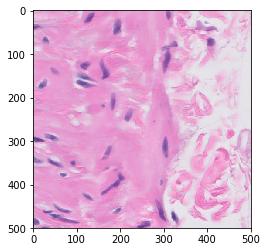

Generated image


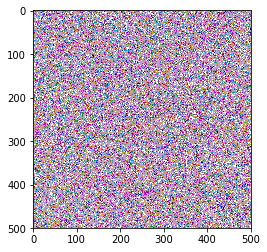

Loss: 8955118000.0
Reconstruction loss: 8955118000.0
KL Divergence: 0.0
Starting epoch 26
Done with epoch 26 
Ground truth image


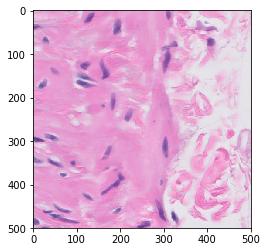

Generated image


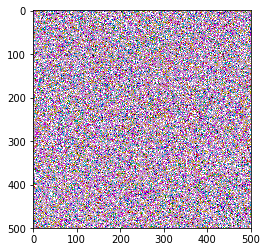

Loss: 8953993000.0
Reconstruction loss: 8953993000.0
KL Divergence: 0.0
Starting epoch 27
Done with epoch 27 
Ground truth image


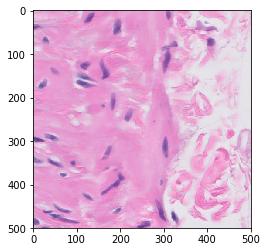

Generated image


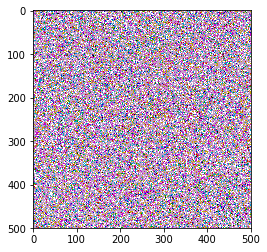

Loss: 8952806000.0
Reconstruction loss: 8952806000.0
KL Divergence: 0.0
Starting epoch 28
Done with epoch 28 
Ground truth image


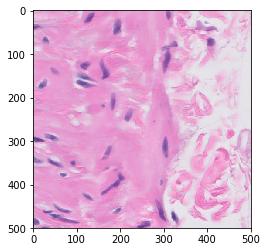

Generated image


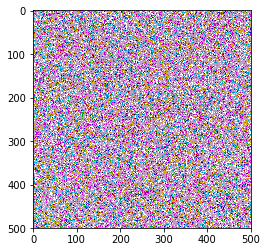

Loss: 8951817000.0
Reconstruction loss: 8951817000.0
KL Divergence: 0.0
Starting epoch 29
Done with epoch 29 
Ground truth image


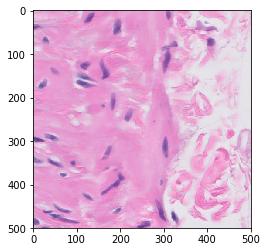

Generated image


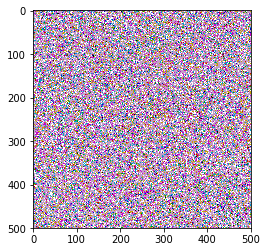

Loss: 8950759000.0
Reconstruction loss: 8950759000.0
KL Divergence: 0.0


In [6]:
train_vae(num_epochs=30, batch_size=32, learning_rate=0.001)